In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
df=pd.read_csv('insurance_data.csv')

In [3]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [4]:
X_train,X_test,y_train,y_test=train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2,random_state=42)

In [5]:
X_train_scaled=X_train.copy()
X_train_scaled['age']=X_train_scaled['age']/100

X_test_scaled=X_test.copy()
X_test_scaled['age']=X_test_scaled['age']/100

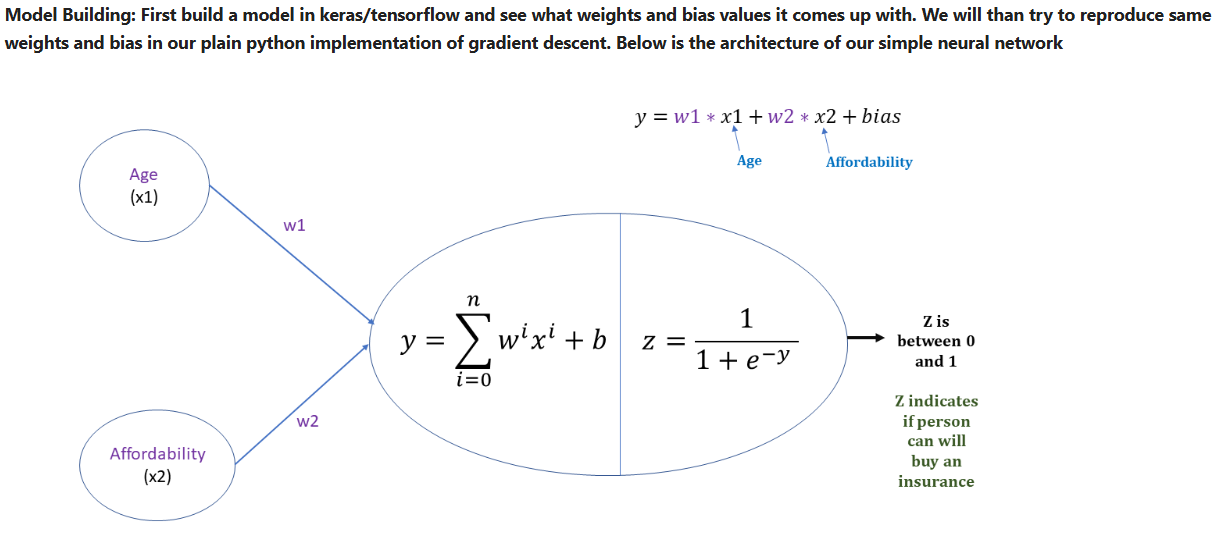

In [6]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=100)

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7428
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5000 - loss: 0.7424
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 0.7420
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.7416
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.7411
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5000 - loss: 0.7407
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.5000 - loss: 0.7403
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.5000 - loss: 0.7399
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.5000 - loss: 0.7395
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - loss: 0.7390
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.5000 - loss: 0.7386
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5000 - l

In [7]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.5000 - loss: 0.5915


[0.591525137424469, 0.5]

In [8]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[0.7955503 ],
       [0.7850492 ],
       [0.79701895],
       [0.53450745],
       [0.73216283],
       [0.5367594 ]], dtype=float32)

In [9]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64

Now get the value of weights and bias from the model

In [10]:
coef, intercept = model.get_weights()

In [11]:
coef, intercept

(array([[0.90535516],
        [0.9035883 ]], dtype=float32),
 array([-0.09714283], dtype=float32))

In [12]:
def sigmoid(x):
    import math
    return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [13]:
X_test

,age,affordibility
9,61,1
25,54,1
8,62,1
21,26,0
0,22,1
12,27,0


Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [14]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_3644\1668309685.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.7741618630100063

In [15]:
prediction_function(.18, 1)

C:\Users\hp\AppData\Local\Temp\ipykernel_3644\1668309685.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.725001776148902

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [16]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [17]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [18]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [19]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,100, 0.4631)

Epoch:0, w1:0.9736899318847281, w2:0.931388810977659, bias:-0.11748951666770448, loss:0.7428288579142563
Epoch:1, w1:0.9536535852311094, w2:0.8740290167758512, bias:-0.21881533456146035, loss:0.7072146449948487
Epoch:2, w1:0.9393731039296969, w2:0.8271852202997496, bias:-0.3053620401943441, loss:0.6814881914786812
Epoch:3, w1:0.9301932588998061, w2:0.7897792032048467, bias:-0.37884372361582785, loss:0.6633428084673968
Epoch:4, w1:0.9254091137248938, w2:0.7605726653866934, bias:-0.44108236820018304, loss:0.650742850709519
Epoch:5, w1:0.9243325693598607, w2:0.738313053647322, bias:-0.49384257986251556, loss:0.6420508089402462
Epoch:6, w1:0.926333296357235, w2:0.7218280753843739, bias:-0.5387319906498417, loss:0.6360356979531208
Epoch:7, w1:0.930858097563688, w2:0.7100747303660235, bias:-0.5771558825717441, loss:0.631816485354411
Epoch:8, w1:0.9374354910317362, w2:0.7021560855322683, bias:-0.6103083840841516, loss:0.6287844495353145
Epoch:9, w1:0.9456716791005845, w2:0.6973185496313956, b

(np.float64(2.2146032795506274),
 np.float64(1.0193035105358637),
 np.float64(-1.515004324201286))

In [31]:
class myNN():
    def __init__(self):
        self.w1=1
        self.w2=1
        self.bias=0
    
    def fit(self,X,y,epochs,loss_thresold):
        self.w1,self.w2,self.bias=self.gradient_descent(X['age'],X['affordibility'],y,epochs,loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

    def predict(self,X_test):
        weighted_sum=self.w1*X_test[:,0]+self.w2*X_test[:,1]+self.bias
        y_predicted=sigmoid_numpy(weighted_sum)
        return y_predicted

    def gradient_descent(self, age, affordibility, y_true, epochs, loss_thresold):
        w1=w2=1
        bias=0
        rate=0.5
        n=len(age)

        for i in range(epochs):
            weighted_sum=w1*age + w2*affordibility + bias
            y_predicted=sigmoid_numpy(weighted_sum)
            loss=log_loss(y_true,y_predicted)

            dw1=np.dot(np.transpose(age),(y_predicted-y_true))/n
            dw2=np.dot(np.transpose(affordibility),(y_predicted-y_true))/n
            dbias=np.mean(y_predicted-y_true)

            w1=w1-rate*dw1
            w2=w2-rate*dw2
            bias=bias-rate*dbias

            if i%50==0:
                print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_thresold:
                print(f'Loss is less than or equal to {loss_thresold}. Stopping training.')
                break
        return w1,w2,bias

In [32]:
mymodel=myNN()

In [33]:
mymodel.fit(X_train_scaled,y_train,100,0.4631)

Epoch:0, w1:0.9736899318847281, w2:0.931388810977659, bias:-0.11748951666770448, loss:0.7428288579142563
Epoch:50, w1:1.524279872239132, w2:0.8822187836689879, bias:-1.1310088596841466, loss:0.5943161377198863
Final weights and bias: w1: 2.2146032795506274, w2: 1.0193035105358637, bias: -1.515004324201286


In [34]:
mymodel.predict(X_test_scaled.values)

array([0.70165833, 0.66822878, 0.70627344, 0.28106046, 0.49787799,
       0.28555702])

In [36]:
model.predict(X_test_scaled.values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[0.7955503 ],
       [0.7850492 ],
       [0.79701895],
       [0.53450745],
       [0.73216283],
       [0.5367594 ]], dtype=float32)